[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1R09B1_x12uPssVMqjq7Z2cVBEn2AkzJ4#scrollTo=iB0ROt4LD197)

In [0]:
!pip install numpy==1.16.1

In [0]:
!pip install pandas==0.24.1

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.compose import TransformedTargetRegressor

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

%matplotlib inline

In [4]:
data = pd.read_csv("/content/gdrive/My Drive/RN/datos/diabetes.csv") 
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [0]:
X = data.drop(['Y'], axis=1)
y = data['Y']

In [0]:
def evaluate_model_crossval(model, X, y, cv=5, seed=12345):
    kfold = KFold(n_splits=5, random_state=seed)
    scores = cross_val_score(model, X, y, cv=kfold)
    print(f'Cross-val score R2: {scores.mean():0.2f} (+/- {(scores.std() * 2):0.2f})')
    
    
def evaluate_model(model, X, y, di=0, df=350):
    y_pred = model.predict(X)    
    diag = np.linspace(di, df, 100)
    plt.figure(figsize=(7,7))
    plt.title(f'MSE: {mean_squared_error(y, y_pred):.2f}, R2: {r2_score(y, y_pred):.2f}')
    plt.xlabel('y')
    plt.ylabel('y_pred')
    plt.plot(y, y_pred, 'o', markersize=3)
    plt.plot(diag, diag);
    plt.show();

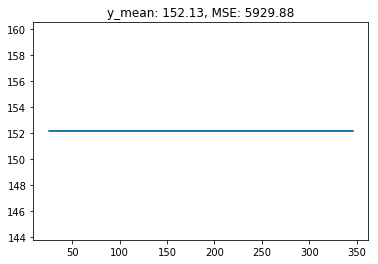

In [15]:
#PROMEDIO
y_naive = y.mean()
y_naive_v = np.repeat(y_naive, len(y))
mse = mean_squared_error(y, y_naive_v)
plt.title(f'y_mean: {y_naive:.2f}, MSE: {mse:.2f}')
plt.plot(y, y_naive_v);

Cross-val score R2: 0.48 (+/- 0.10)


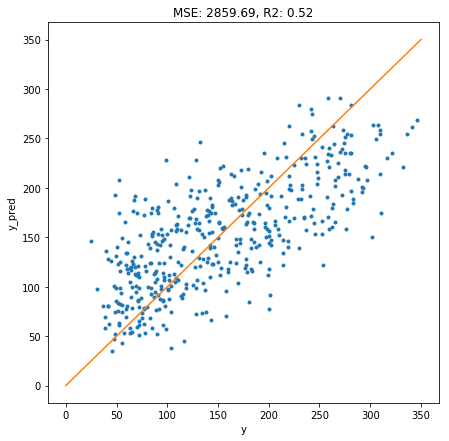

In [16]:
#Regresión lineal base
lr = LinearRegression()
lr.fit(X, y)
evaluate_model_crossval(lr, X, y)
evaluate_model(lr, X, y)